In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv("C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/behavioral-bias-detector/data/processed/TCS_features.csv")
df.head()

,date,close,high,low,open,volume,daily_return,return_5d,return_10d,volatility_10d,rolling_max,drawdown,volume_mean_20d,volume_std_20d,volume_zscore,high_52w,dist_from_52w_high
0,2020-01-13,1919.979858,1945.049432,1915.027149,1944.085341,2843893,-0.010481,-0.004590,0.003275,0.012769,1989.490601,-0.034939,3603601.00,1.934266e+06,-0.392763,1989.490601,-0.034939
1,2020-01-14,1934.487061,1954.560484,1924.056045,1924.056045,2948452,0.007556,0.000476,0.020910,0.012398,1989.490601,-0.027647,3472314.75,1.881876e+06,-0.278373,1989.490601,-0.027647
2,2020-01-15,1952.018066,1955.612060,1923.354499,1939.833926,2620681,0.009062,-0.012571,0.027357,0.012592,1989.490601,-0.018835,3300365.15,1.787783e+06,-0.380183,1989.490601,-0.018835
3,2020-01-16,1962.448975,1971.389873,1941.586736,1952.061619,3117214,0.005344,0.011041,0.037610,0.012335,1989.490601,-0.013592,3043671.80,1.355948e+06,0.054237,1989.490601,-0.013592
4,2020-01-17,1945.181641,1975.379203,1939.834519,1964.159150,3281059,-0.008799,0.002508,0.008384,0.011468,1989.490601,-0.022272,2895149.50,1.129934e+06,0.341533,1989.490601,-0.022272


In [7]:
df["date"]= pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop = True)
df.head()

,date,close,high,low,open,volume,daily_return,return_5d,return_10d,volatility_10d,rolling_max,drawdown,volume_mean_20d,volume_std_20d,volume_zscore,high_52w,dist_from_52w_high
0,2020-01-13,1919.979858,1945.049432,1915.027149,1944.085341,2843893,-0.010481,-0.004590,0.003275,0.012769,1989.490601,-0.034939,3603601.00,1.934266e+06,-0.392763,1989.490601,-0.034939
1,2020-01-14,1934.487061,1954.560484,1924.056045,1924.056045,2948452,0.007556,0.000476,0.020910,0.012398,1989.490601,-0.027647,3472314.75,1.881876e+06,-0.278373,1989.490601,-0.027647
2,2020-01-15,1952.018066,1955.612060,1923.354499,1939.833926,2620681,0.009062,-0.012571,0.027357,0.012592,1989.490601,-0.018835,3300365.15,1.787783e+06,-0.380183,1989.490601,-0.018835
3,2020-01-16,1962.448975,1971.389873,1941.586736,1952.061619,3117214,0.005344,0.011041,0.037610,0.012335,1989.490601,-0.013592,3043671.80,1.355948e+06,0.054237,1989.490601,-0.013592
4,2020-01-17,1945.181641,1975.379203,1939.834519,1964.159150,3281059,-0.008799,0.002508,0.008384,0.011468,1989.490601,-0.022272,2895149.50,1.129934e+06,0.341533,1989.490601,-0.022272


In [9]:
RETURN_THRESHOLD = -0.02      # -2% daily loss
VOLUME_Z_THRESHOLD = 2.0      # 2 standard deviations

In [15]:
df["panic_sell"]= (
    (df["daily_return"] <=RETURN_THRESHOLD)&
    (df["volume_zscore"] >= VOLUME_Z_THRESHOLD)
)
df.head()

,date,close,high,low,open,volume,daily_return,return_5d,return_10d,volatility_10d,rolling_max,drawdown,volume_mean_20d,volume_std_20d,volume_zscore,high_52w,dist_from_52w_high,panic_sell
0,2020-01-13,1919.979858,1945.049432,1915.027149,1944.085341,2843893,-0.010481,-0.004590,0.003275,0.012769,1989.490601,-0.034939,3603601.00,1.934266e+06,-0.392763,1989.490601,-0.034939,False
1,2020-01-14,1934.487061,1954.560484,1924.056045,1924.056045,2948452,0.007556,0.000476,0.020910,0.012398,1989.490601,-0.027647,3472314.75,1.881876e+06,-0.278373,1989.490601,-0.027647,False
2,2020-01-15,1952.018066,1955.612060,1923.354499,1939.833926,2620681,0.009062,-0.012571,0.027357,0.012592,1989.490601,-0.018835,3300365.15,1.787783e+06,-0.380183,1989.490601,-0.018835,False
3,2020-01-16,1962.448975,1971.389873,1941.586736,1952.061619,3117214,0.005344,0.011041,0.037610,0.012335,1989.490601,-0.013592,3043671.80,1.355948e+06,0.054237,1989.490601,-0.013592,False
4,2020-01-17,1945.181641,1975.379203,1939.834519,1964.159150,3281059,-0.008799,0.002508,0.008384,0.011468,1989.490601,-0.022272,2895149.50,1.129934e+06,0.341533,1989.490601,-0.022272,False


In [33]:
panic_count = df["panic_sell"].sum()
total_days = len(df)
panic_ratio = panic_count / total_days
panic_count, round(panic_ratio * 100, 2)

(17, 1.38)

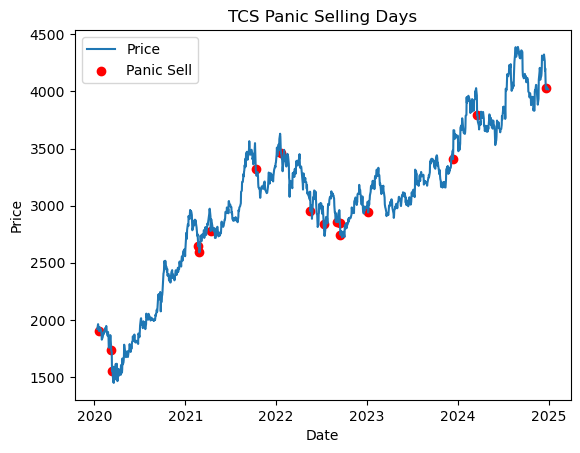

In [59]:
plt.figure()
plt.plot(df["date"], df["close"], label="Price")

panic_days = df[df["panic_sell"]]

plt.scatter(
    panic_days["date"],
    panic_days["close"],
    marker="o",
    label="Panic Sell",
    color = "red"
)

plt.title("TCS Panic Selling Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


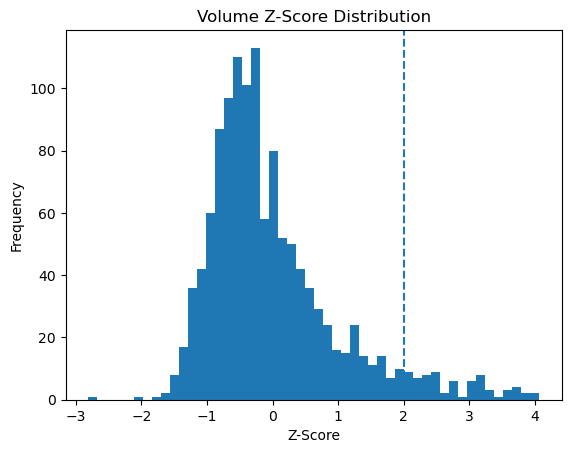

In [61]:
plt.figure()
plt.hist(df["volume_zscore"], bins=50)
plt.axvline(VOLUME_Z_THRESHOLD, linestyle="--")
plt.title("Volume Z-Score Distribution")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.show()

In [63]:
df.to_csv("C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/behavioral-bias-detector/data/processed/TCS_panic_signals.csv",index = False)